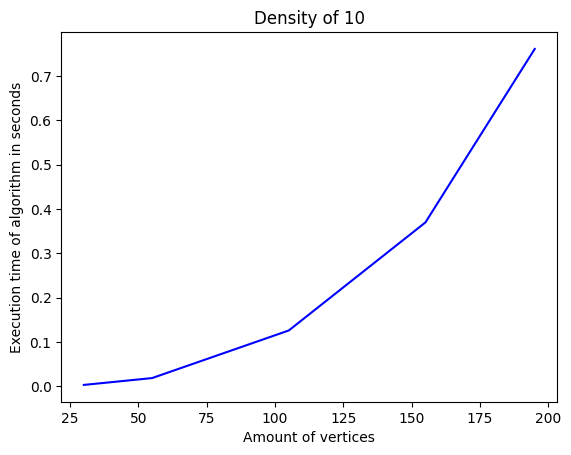

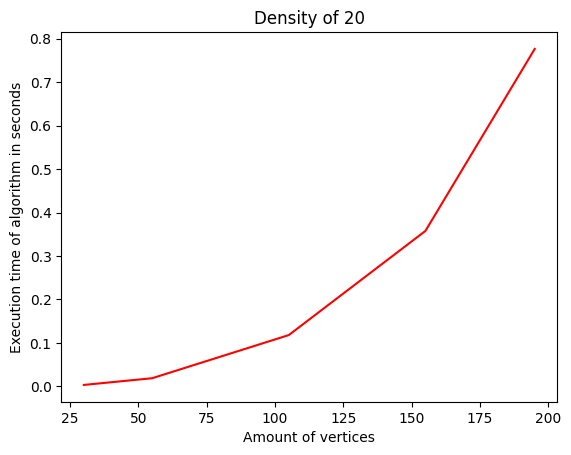

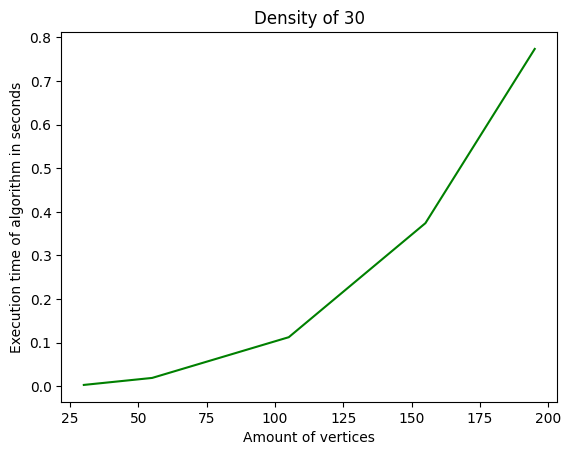

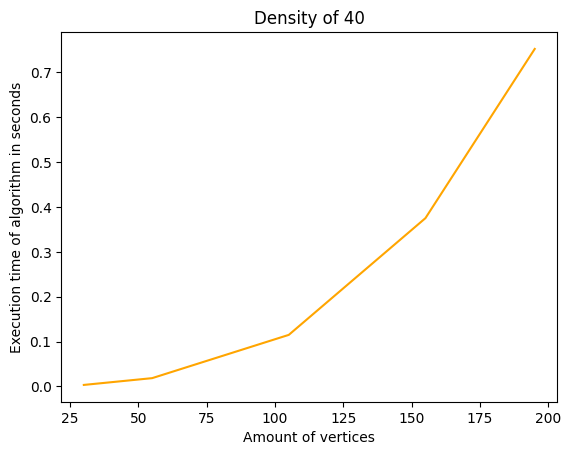

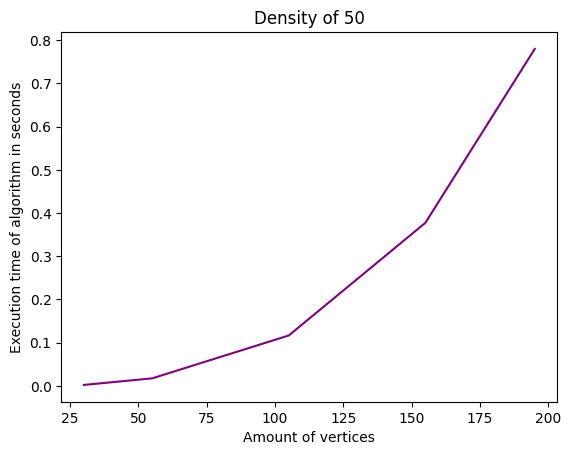

In [1]:
from GraphGenerator import *
from WarshallAlgorithm import *
import matplotlib.pyplot as plt
import numpy as np
from Conversions import *
from prettytable import PrettyTable


list_of_n_vertices = [30,55,105,155,195]
list_of_density= [10,20,30,40,50]
AMOUNT_OF_EXPERIMENT = 40
dict_n_verticle = {}
for n_vertices in list_of_n_vertices:
    dict_n_verticle[n_vertices] = []
    for density in list_of_density:
        n = 0
        list_conduction_time = []
        while n < AMOUNT_OF_EXPERIMENT:
            graph = GraphGenerator.generate(n_vertices, density)
            reachability_matrix, conduction_time = WarshallAlgorithm.get_reachability_matrix(graph)
            list_conduction_time.append(Conversions.convert_microseconds_to_seconds(conduction_time))
            n += 1
        dict_n_verticle[n_vertices].append((density, np.mean(list_conduction_time)))



result_table = PrettyTable(['Amount of verticles', 'Density','Average execution of algorithm in seconds'])
for n_vertices in dict_n_verticle.keys():
    list_value_given_amount_of_vericle = dict_n_verticle[n_vertices]
    for value in list_value_given_amount_of_vericle:
        density,time = value
        result_table.add_row([n_vertices, density, time])
with open('file.txt', 'w') as file_table:
    file_table.write(str(result_table))



list_for_graphs = []
colors = ['blue', 'red', 'green', 'orange', 'purple']

for n_vertices in dict_n_verticle.keys():
    list_value_given_amount_of_vericle = dict_n_verticle[n_vertices]
    for value in list_value_given_amount_of_vericle:
        density,time = value
        list_for_graphs.append([n_vertices, density, time])

dict_density = {}
for index, density in enumerate(list_of_density):
    x_list = []
    y_list = []
    for experiment in list_for_graphs:
        if experiment[1] == density:
            x_list.append(experiment[0])
            y_list.append(experiment[2])
    fig, ax = plt.subplots()
    ax.plot(x_list, y_list, color = colors[index])
    ax.set_title(f'Density of {density}')
    ax.set_xlabel('Amount of vertices')
    ax.set_ylabel('Execution time of algorithm in seconds')